# Crime in Toronto's Neighbourhoods

This is an ongoing project that uses data from Toronto's [Open Data](http://www1.toronto.ca/wps/portal/contentonly?vgnextoid=9e56e03bb8d1e310VgnVCM10000071d60f89RCRD), which consists of over 200 datasets provided by the City of Toronto. These datasets are organized into 15 different categories.

For this project, I will focus only on crime in Toronto's neighbourhoods and will likely use two or three datasets. I downloaded the raw datasets as excel sheets and converted them into csv files. Toronto is considered to be a safe city in comparison to other big cities. In a 2015 article in the Economist, Toronto was ranked as the safest major city in North America and the eighth safest major city in the world, as cited in [Wikipedia](https://en.wikipedia.org/wiki/Crime_in_Toronto). Nevertheless, crime trends in a major city such as Toronto are still worth exploring.

For the current project, I am exploring the following topics in no particular order. These topics are dynamic and might change on an ongoing basis.

1) Provide a summarized visualization of all the major crimes in Toronto
(May need to do this with number of crimes divided by the population of that neighbourhood to normalize)

2) Compare 2008 data against 2011 data. Do a box plot comparison of years side by side. How have things changed?

3) Compare 3 most crime prone neighbourhoods against 3 least crime prone neighbourhoods.

4) What is the difference in these neighbourhoods wrt median household income (look into demographics table), and education? Which is the most prominent age group of people? Does this in any way affect crime? (Plot some correlations)

5) Get standardized scores of "total major crime incidents" in each neighbourhood (z-scores). What is the neighbourhood with the most change?

6) What is the reason for number 5. Can the data give us an answer?

7) Finally, come up with something predictive (preferably using machine learning).

#### Import all the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Seaborn settings

In [2]:
# seaborn setting
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8,4)})

#### Read the data files as pandas dataframes

In [3]:
c = pd.read_csv('TorontoCrime2011.csv')
d = pd.read_csv('TorontoDemographics2011.csv')

# Also read in the 2008 data files
c2 = pd.read_csv('TorontoCrime2008.csv')
d2 = pd.read_csv('TorontoDemographics2008.csv')

#### Let's take a quick look at the top few rows of the 2011 and 2008 Toronto Crime dataframes.

In [4]:
#2011 dataframe
c.head()

,Neighbourhood,Neighbourhood Id,Arsons,Assaults,Break & Enters,Drug Arrests,Fire Medical Calls,Fire Vehicle Incidents,Fires & Fire Alarms,Hazardous Incidents,Murders,Robberies,Sexual Assaults,Thefts,Total Major Crime Incidents,Vehicle Thefts
0,West Humber-Clairville,1,4,390,175,62,1321,502,705,210,0,82,68,54,1119,288
1,Mount Olive-Silverstone-Jamestown,2,3,316,61,90,1016,59,361,176,1,78,75,7,690,62
2,Thistletown-Beaumond Heights,3,0,85,36,16,323,48,90,34,0,17,24,2,192,12
3,Rexdale-Kipling,4,0,59,32,15,305,34,94,55,1,16,20,3,164,18
4,Elms-Old Rexdale,5,1,77,25,14,321,71,107,43,0,23,5,19,185,22


In [5]:
#2008 dataframe
c2.head()

,Neighbourhood,Neighbourhood Id,Ambulance Calls,Ambulance Referrals,Arsons,Assaults,Break & Enters,Drug Arrests,Fire Vehicle Incidents,Firearms Incidents,Fires & Fire Alarms,Hazardous Incidents,Murders,Robberies,Sexual Assaults,TCHC Safety Incidents,Thefts,Vehicle Thefts
0,West Humber-Clairville,1,3613,10,4,272,193,88,674,3,135,269,1,85,21,62,42,341
1,Mount Olive-Silverstone-Jamestown,2,2229,5,0,269,88,145,52,11,70,163,0,80,23,426,6,113
2,Thistletown-Beaumond Heights,3,793,5,0,66,30,27,20,0,26,48,0,23,5,89,2,16
3,Rexdale-Kipling,4,664,5,0,49,28,17,14,0,26,64,0,16,6,48,0,25
4,Elms-Old Rexdale,5,836,3,2,49,22,8,45,1,23,52,0,26,3,138,2,17


We notice a few differences between the crime datasets for 2008 and 2011, where 2008 does not have a column for total major crimes. Now, let's take a look at the top few rows of the 2011 and 2008 Toronto Demographics dataframes.

In [6]:
# 2011 dataframe
d.head()

,Neighbourhood,Neighbourhood Id,Total Area,Total Population,Pop - Males,Pop - Females,Pop 0 - 4 years,Pop 5 - 9 years,Pop 10 - 14 years,Pop 15 -19 years,...,Language - Chinese,Language - Italian,Language - Korean,Language - Persian (Farsi),Language - Portuguese,Language - Russian,Language - Spanish,Language - Tagalog,Language - Tamil,Language - Urdu
0,West Humber-Clairville,1,30.09,34100,17095,17000,1865,1950,2155,2550,...,475,925,95,160,205,15,1100,850,715,715
1,Mount Olive-Silverstone-Jamestown,2,4.60,32790,16015,16765,2575,2535,2555,2620,...,275,750,60,350,115,50,820,345,1420,1075
2,Thistletown-Beaumond Heights,3,3.40,10140,4920,5225,575,580,670,675,...,95,705,35,115,105,15,570,130,120,300
3,Rexdale-Kipling,4,2.50,10485,5035,5455,495,520,570,665,...,95,475,30,95,145,30,700,180,70,215
4,Elms-Old Rexdale,5,2.90,9550,4615,4935,670,720,720,725,...,90,510,55,285,80,30,670,195,60,140


In [7]:
# 2008 dataframe
# We notice that the 2008 dataset had more columns
d2.head()

,Neighbourhood,Neighbourhood Id,Total Area,Total Population,Pop - Males,Pop - Females,Pop 0 - 4 years,Pop 5 - 9 years,Pop 10 - 14 years,Pop 15 -19 years,...,Home Repairs Needed,Tenant Average Rent,Low Income Families,Low Income Singles,Low Income Children,Family Income Category,Average Family Income,Household Income Category,Pre-Tax Household Income,After-Tax Household Income
0,West Humber-Clairville,1,30.09,32265,16295,15960,2005,2135,2325,2180,...,365,850,7720,725,643,7720,67240,8960,63415,63977
1,Mount Olive-Silverstone-Jamestown,2,4.60,32130,15900,16230,2680,2680,2685,2285,...,980,875,7715,1177,1206,7720,52745,9265,48145,49601
2,Thistletown-Beaumond Heights,3,3.40,9925,4900,5035,615,625,645,630,...,185,875,2520,305,161,2520,71300,3150,55030,54910
3,Rexdale-Kipling,4,2.50,10725,5205,5525,580,645,665,640,...,300,835,2780,653,135,2775,65215,3880,52430,53779
4,Elms-Old Rexdale,5,2.90,9440,4615,4820,725,700,745,655,...,320,895,2560,255,328,2555,56515,3130,53780,55054


We can take a quick look at all the columns to get an idea. We noticed a difference between the crime datasets in 2011 and 2008, which is reflected in the column names.

In [8]:
c.columns #2011

Index([u'Neighbourhood', u'Neighbourhood Id', u'Arsons', u'Assaults',
       u'Break & Enters', u'Drug Arrests', u'Fire Medical Calls',
       u'Fire Vehicle Incidents', u'Fires & Fire Alarms',
       u'Hazardous Incidents', u'Murders', u'Robberies', u'Sexual Assaults',
       u'Thefts', u'Total Major Crime Incidents', u'Vehicle Thefts'],
      dtype='object')

In [9]:
c2.columns #2008

Index([u'Neighbourhood', u'Neighbourhood Id', u'Ambulance Calls',
       u'Ambulance Referrals', u'Arsons', u'Assaults', u'Break & Enters',
       u'Drug Arrests', u'Fire Vehicle Incidents', u'Firearms Incidents',
       u'Fires & Fire Alarms', u'Hazardous Incidents', u'Murders',
       u'Robberies', u'Sexual Assaults', u'TCHC Safety Incidents', u'Thefts',
       u'Vehicle Thefts'],
      dtype='object')

In [10]:
# We can add a column called "Total Major Crime Incidents" in the 2008 dataframe to facilitate comparisons
c2['Total Major Crime Incidents'] = c2['Assaults'] + c2['Break & Enters'] + c2['Drug Arrests'] + c2['Murders'] + c2['Robberies'] + c2['Sexual Assaults'] + c2['Thefts'] + c2['Vehicle Thefts'] 

In [11]:
c2.head()

,Neighbourhood,Neighbourhood Id,Ambulance Calls,Ambulance Referrals,Arsons,Assaults,Break & Enters,Drug Arrests,Fire Vehicle Incidents,Firearms Incidents,Fires & Fire Alarms,Hazardous Incidents,Murders,Robberies,Sexual Assaults,TCHC Safety Incidents,Thefts,Vehicle Thefts,Total Major Crime Incidents
0,West Humber-Clairville,1,3613,10,4,272,193,88,674,3,135,269,1,85,21,62,42,341,1043
1,Mount Olive-Silverstone-Jamestown,2,2229,5,0,269,88,145,52,11,70,163,0,80,23,426,6,113,724
2,Thistletown-Beaumond Heights,3,793,5,0,66,30,27,20,0,26,48,0,23,5,89,2,16,169
3,Rexdale-Kipling,4,664,5,0,49,28,17,14,0,26,64,0,16,6,48,0,25,141
4,Elms-Old Rexdale,5,836,3,2,49,22,8,45,1,23,52,0,26,3,138,2,17,127


#### Let's see how many official neighbourhoods Toronto is broken down into. Also, this helps us check to see whether the neighbourhood IDs are the same in both data sets to enable easy merging of rows.

In [12]:
len(c)

140

In [13]:
len(d)

140

#### Let's take a look now at all the columns in the demographics data set. 

In [14]:
d.columns #2011

Index([u'Neighbourhood', u'Neighbourhood Id', u'Total Area',
       u'Total Population', u'Pop - Males', u'Pop - Females',
       u'Pop 0 - 4 years', u'Pop 5 - 9 years', u'Pop 10 - 14 years',
       u'Pop 15 -19 years', u'Pop 20 - 24 years', u'Pop  25 - 29 years',
       u'Pop 30 - 34 years', u'Pop 35 - 39 years', u'Pop 40 - 44 years',
       u'Pop 45 - 49 years', u'Pop 50 - 54 years', u'Pop 55 - 59 years',
       u'Pop 60 - 64 years', u'Pop 65 - 69 years', u'Pop 70 - 74 years',
       u'Pop 75 - 79 years', u'Pop 80 - 84 years', u'Pop 85 years and over',
       u'Seniors 55 and over', u'Seniors 65 and over', u'Child 0-14',
       u'Youth 15-24', u'Home Language Category', u'   Language - Chinese',
       u'   Language - Italian', u'   Language - Korean',
       u'   Language - Persian (Farsi)', u'   Language - Portuguese',
       u'   Language - Russian', u'   Language - Spanish',
       u'   Language - Tagalog', u'   Language - Tamil',
       u'   Language - Urdu'],
      dtype='objec

In [15]:
d2.columns #2008

Index([u'Neighbourhood', u'Neighbourhood Id', u'Total Area',
       u'Total Population', u'Pop - Males', u'Pop - Females',
       u'Pop 0 - 4 years', u'Pop 5 - 9 years', u'Pop 10 - 14 years',
       u'Pop 15 -19 years', u'Pop 20 - 24 years', u'Pop  25 - 29 years',
       u'Pop 30 - 34 years', u'Pop 35 - 39 years', u'Pop 40 - 44 years',
       u'Pop 45 - 49 years', u'Pop 50 - 54 years', u'Pop 55 - 59 years',
       u'Pop 60 - 64 years', u'Pop 65 - 69 years', u'Pop 70 - 74 years',
       u'Pop 75 - 79 years', u'Pop 80 - 84 years', u'Pop 85 years and over',
       u'Pop 6-12 years', u'Visible Minority Category', u'   Chinese',
       u'   South Asian', u'   Black', u'   Filipino', u'   Latin American',
       u'   Southeast Asian', u'   Arab', u'   West Asian', u'   Korean',
       u'   Japanese', u'   Other Visible Minority',
       u'   Multiple Visible Minority', u'   Not a Visible Minority',
       u'Aboriginal', u'Home Language Category', u'   Language - Chinese',
       u'   Languag

We notice several other columns in the 2008 demographics dataset. These additional columns cannot be used to make comparisons between 2008 and 2011.

#### Our focus for this data story will only be on major crime incidents. Eight categories of crimes fall under major crime - Assaults, Break & Enters, Drug Arrests, Murders, Robberies, Sexual Assaults, Thefts (over 5k), and Vehicle Thefts

In [16]:
#max(c)
c['Total Major Crime Incidents'].max()
#c.min().sort_values(ascending=False)
#c.max().sort_values(ascending=False)

1393

In [17]:
# Selecting just the major crime incidents in 2011 as a dataframe. Find the mean
c_box = c.iloc[:,[3,4,5,10,11,12,13,14,15]]#[:,2:]
c_box.mean().sort_values()

Murders                          0.350000
Thefts                           6.478571
Sexual Assaults                 17.621429
Vehicle Thefts                  29.821429
Robberies                       34.442857
Drug Arrests                    36.542857
Break & Enters                  75.250000
Assaults                       150.621429
Total Major Crime Incidents    351.128571
dtype: float64

When we look at the means, we notice that murders and thefts occur lesser than the remaining six categories.

In [18]:
#c_box.median().sort_values()

We can compare the top three major crime incidents and the total major crime incidents visually using a box plot.

In [19]:
c_box.head()

,Assaults,Break & Enters,Drug Arrests,Murders,Robberies,Sexual Assaults,Thefts,Total Major Crime Incidents,Vehicle Thefts
0,390,175,62,0,82,68,54,1119,288
1,316,61,90,1,78,75,7,690,62
2,85,36,16,0,17,24,2,192,12
3,59,32,15,1,16,20,3,164,18
4,77,25,14,0,23,5,19,185,22


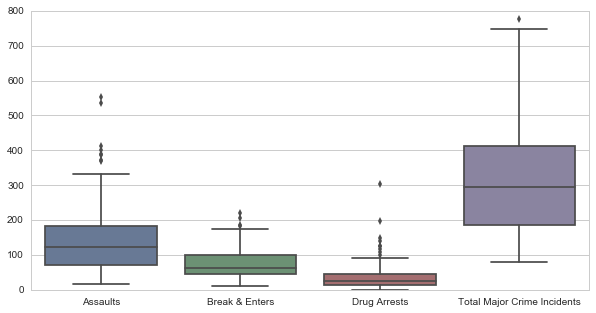

In [20]:
%matplotlib inline
sns.set_style("whitegrid")
plt.figure(figsize=(10,5)) # This allows us to set the width and height of the box plot
plt.ylim(0,800) # This allows us to limit the range of the y-axis. This is helpful because we have a lot of outliers.
sns.boxplot(data=c_box.iloc[:,[0,1,2,7]])

From the box plot, we see that "Assaults" vary the most between neighbourhoods, in comparison to "Break & Enters" and "Drug Arrests". Has anything changed from 2008? Let's take a look at the 2008 data.

In [21]:
# Selecting just the major crime incidents in 2008 as a dataframe. Find the mean
c2_box = c2.iloc[:,[5,6,7,12,13,14,16,17,18]]
c2_box.mean().sort_values()

Murders                          0.457143
Thefts                           6.657143
Sexual Assaults                 10.021429
Robberies                       28.650000
Vehicle Thefts                  45.321429
Drug Arrests                    64.350000
Break & Enters                  64.757143
Assaults                       121.285714
Total Major Crime Incidents    341.500000
dtype: float64

The pattern is more or less the same, however, the number of drug arrests have increased.

In [22]:
c2_box.head()

,Assaults,Break & Enters,Drug Arrests,Murders,Robberies,Sexual Assaults,Thefts,Vehicle Thefts,Total Major Crime Incidents
0,272,193,88,1,85,21,42,341,1043
1,269,88,145,0,80,23,6,113,724
2,66,30,27,0,23,5,2,16,169
3,49,28,17,0,16,6,0,25,141
4,49,22,8,0,26,3,2,17,127


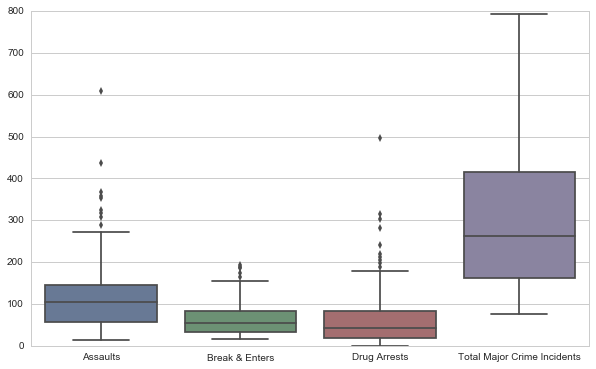

In [23]:
%matplotlib inline
sns.set_style("whitegrid")
plt.figure(figsize=(10,6)) # This allows us to set the width and height of the box plot
plt.ylim(0,800) # This allows us to limit the range of the y-axis. This is helpful because we have a lot of outliers.
sns.boxplot(data=c2_box.iloc[:,[0,1,2,8]])

We notice an increase in the range and variance of drug arrests. But we do not see any major changes in the order of mean frequency of the types of crimes when comparing 2008 and 2011.

We can also plot these comparisons between types of crimes and years, as violin plots. One advantage of the violin plot is that it shows a kernel density plot instead of a box. So, we get probability density without the need for a histogram (killing two birds with one stone!). Plots for 2011 and 2008 are provided below.

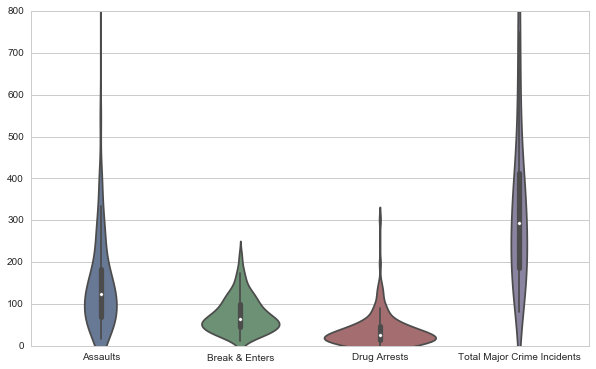

In [24]:
%matplotlib inline
sns.set_style("whitegrid")
plt.figure(figsize=(10,6)) # This allows us to set the width and height of the box plot
plt.ylim(0,800) # This allows us to limit the range of the y-axis. This is helpful because we have a lot of outliers.
sns.violinplot(data=c_box.iloc[:,[0,1,2,7]])

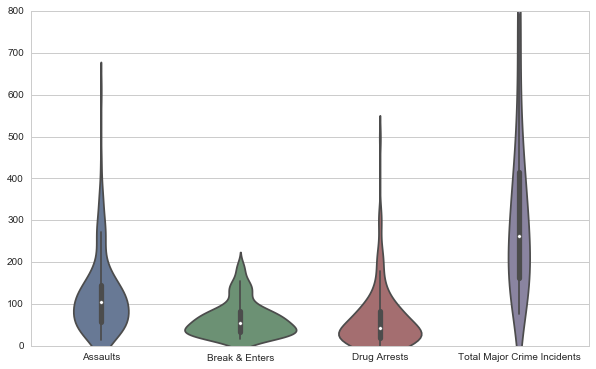

In [25]:
%matplotlib inline
sns.set_style("whitegrid")
plt.figure(figsize=(10,6)) # This allows us to set the width and height of the box plot
plt.ylim(0,800) # This allows us to limit the range of the y-axis. This is helpful because we have a lot of outliers.
sns.violinplot(data=c2_box.iloc[:,[0,1,2,8]])

Perhaps a better way to compare crimes between both years is to normalize crimes in each neighbourhood based on the population of that neighbourhood.

In [26]:
c_box_norm = c_box.iloc[:,0:].div(d['Total Population'], axis=0)
c2_box_norm = c2_box.iloc[:,0:].div(d2['Total Population'], axis=0)

In [27]:
c_box_norm.head()

,Assaults,Break & Enters,Drug Arrests,Murders,Robberies,Sexual Assaults,Thefts,Total Major Crime Incidents,Vehicle Thefts
0,0.011437,0.005132,0.001818,0.000000,0.002405,0.001994,0.001584,0.032815,0.008446
1,0.009637,0.001860,0.002745,0.000030,0.002379,0.002287,0.000213,0.021043,0.001891
2,0.008383,0.003550,0.001578,0.000000,0.001677,0.002367,0.000197,0.018935,0.001183
3,0.005627,0.003052,0.001431,0.000095,0.001526,0.001907,0.000286,0.015641,0.001717
4,0.008063,0.002618,0.001466,0.000000,0.002408,0.000524,0.001990,0.019372,0.002304


In [28]:
c2_box_norm.head()

,Assaults,Break & Enters,Drug Arrests,Murders,Robberies,Sexual Assaults,Thefts,Vehicle Thefts,Total Major Crime Incidents
0,0.008430,0.005982,0.002727,0.000031,0.002634,0.000651,0.001302,0.010569,0.032326
1,0.008372,0.002739,0.004513,0.000000,0.002490,0.000716,0.000187,0.003517,0.022533
2,0.006650,0.003023,0.002720,0.000000,0.002317,0.000504,0.000202,0.001612,0.017028
3,0.004569,0.002611,0.001585,0.000000,0.001492,0.000559,0.000000,0.002331,0.013147
4,0.005191,0.002331,0.000847,0.000000,0.002754,0.000318,0.000212,0.001801,0.013453


Now, we can compare the means of all major crimes again.

In [29]:
# Selecting just the normalized major crime incidents in 2011 as a dataframe.
c_box_norm.mean().sort_values()

Murders                        0.000019
Thefts                         0.000346
Sexual Assaults                0.000958
Vehicle Thefts                 0.001519
Robberies                      0.001860
Drug Arrests                   0.002027
Break & Enters                 0.004113
Assaults                       0.008057
Total Major Crime Incidents    0.018900
dtype: float64

In [30]:
# Selecting just the normalized major crime incidents in 2008 as a dataframe.
c2_box_norm.mean().sort_values()

Murders                        0.000026
Thefts                         0.000359
Sexual Assaults                0.000569
Robberies                      0.001622
Vehicle Thefts                 0.002442
Break & Enters                 0.003740
Drug Arrests                   0.003781
Assaults                       0.006885
Total Major Crime Incidents    0.019423
dtype: float64

We notice that total major crime incidents per person are approximately the same for both years, suggesting that major crime has not increased in Toronto with every year. 

In [31]:
%matplotlib inline

In [32]:
#plt.scatter(c.Robberies, c['Sexual Assaults'])

In [33]:
#c['Robberies']

In [34]:
# t5 is the Top 5, b5 is for Bottom 5; Rob = Robberies; SA = Sexual Assaults; 
# VT = Vehicle Thefts; TMCI = Total Major Crime Incidents
#t5Rob = c.sort_values(['Robberies']).tail(5)
#b5Rob = c.sort_values(['Robberies']).head(5)
#t5SA = c.sort_values(['Sexual Assaults']).tail(5)
#b5SA = c.sort_values(['Sexual Assaults']).head(5)
#t5VT = c.sort_values(['Vehicle Thefts']).tail(5)
#b5VT = c.sort_values(['Vehicle Thefts']).head(5)
t5TMCI_2011 = c.sort_values(['Total Major Crime Incidents']).tail(5)
b5TMCI_2011 = c.sort_values(['Total Major Crime Incidents']).head(5)

In [35]:
t5TMCI_2011[['Neighbourhood', 'Total Major Crime Incidents']] # Most Total Major Crime Incidents

,Neighbourhood,Total Major Crime Incidents
25,Downsview-Roding-CFB,981
74,Church-Yonge Corridor,1006
75,Bay Street Corridor,1017
0,West Humber-Clairville,1119
76,Waterfront Communities-The Island,1393


In [36]:
c_norm = c.iloc[:,2:16].div(d['Total Population'], axis=0)
c_norm['Neighbourhood'] = c.Neighbourhood
c_norm['NID'] = c['Neighbourhood Id']

In [37]:
t5TMCI_2011 = c_norm.sort_values(['Total Major Crime Incidents']).tail(5)
t5TMCI_2011[['Neighbourhood', 'Total Major Crime Incidents']] # Most Total Major Crime Incidents

,Neighbourhood,Total Major Crime Incidents
30,Yorkdale-Glen Park,0.037521
78,University,0.037997
77,Kensington-Chinatown,0.046973
75,Bay Street Corridor,0.052572
72,Moss Park,0.056468
